### Importação dos dados



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Faturamento da loja 1 foi de: 1534509.12
Faturamento da loja 2 foi de: 1488459.06
Faturamento da loja 3 foi de: 1464025.03
Faturamento da loja 4 foi de: 1384497.58


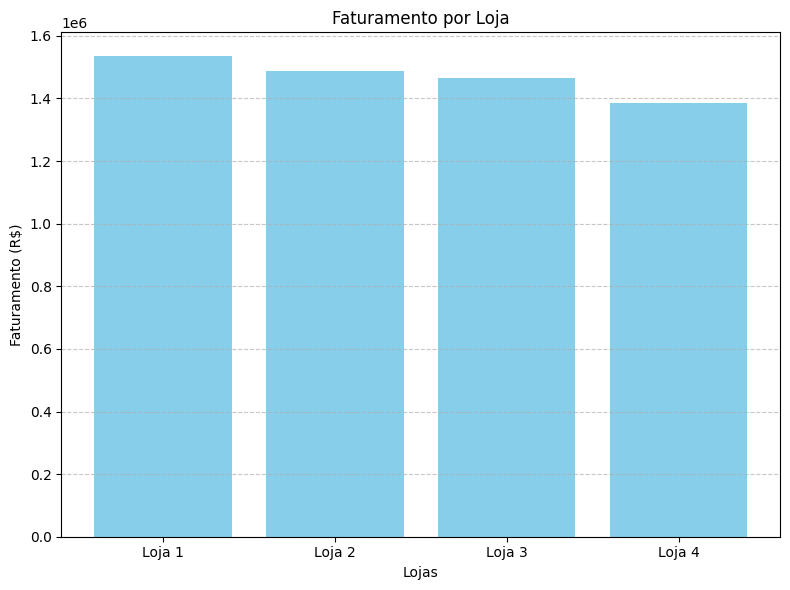

In [ ]:
faturamentoTotalLoja1 = loja['Preço'].sum()
faturamentoTotalLoja2 = loja2['Preço'].sum()
faturamentoTotalLoja3 = loja3['Preço'].sum()
faturamentoTotalLoja4 = loja4['Preço'].sum()
nomesLojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamentoTotalLoja1, faturamentoTotalLoja2, faturamentoTotalLoja3, faturamentoTotalLoja4]
for i in range(1,5):
  print(f"Faturamento da loja {i} foi de: {faturamentos[i-1]}")
plt.figure(figsize=(8, 6))
plt.bar(nomesLojas, faturamentos, color='skyblue')
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


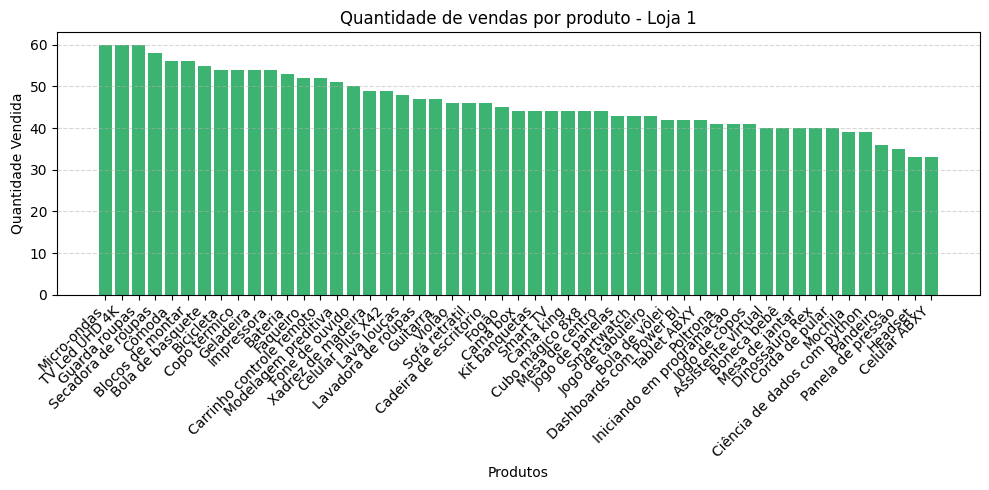

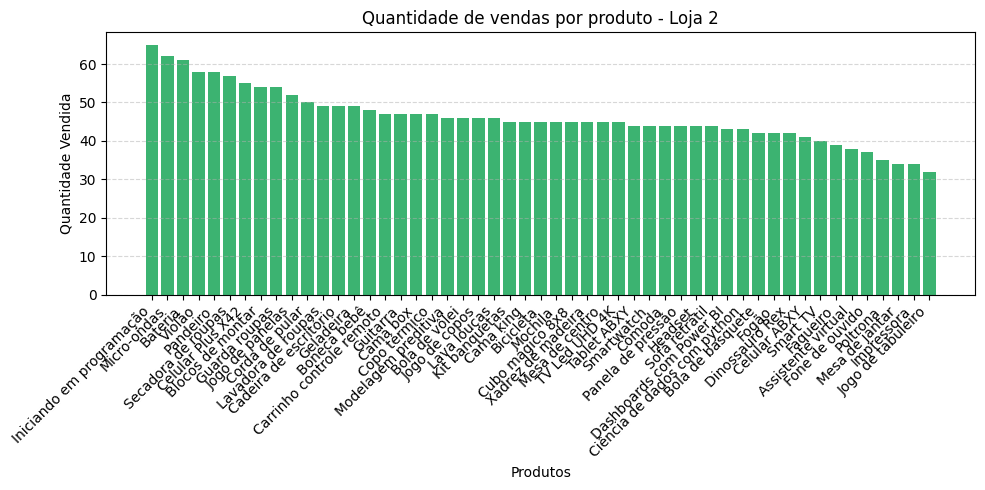

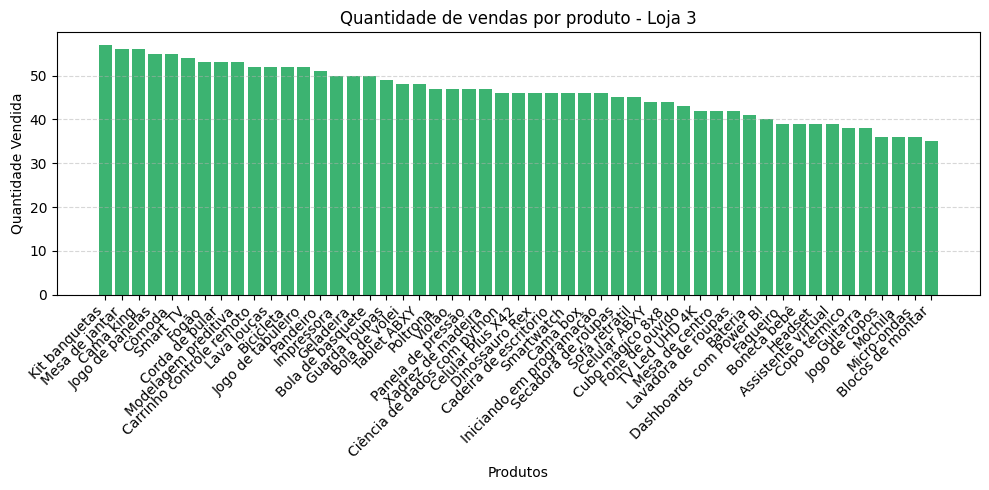

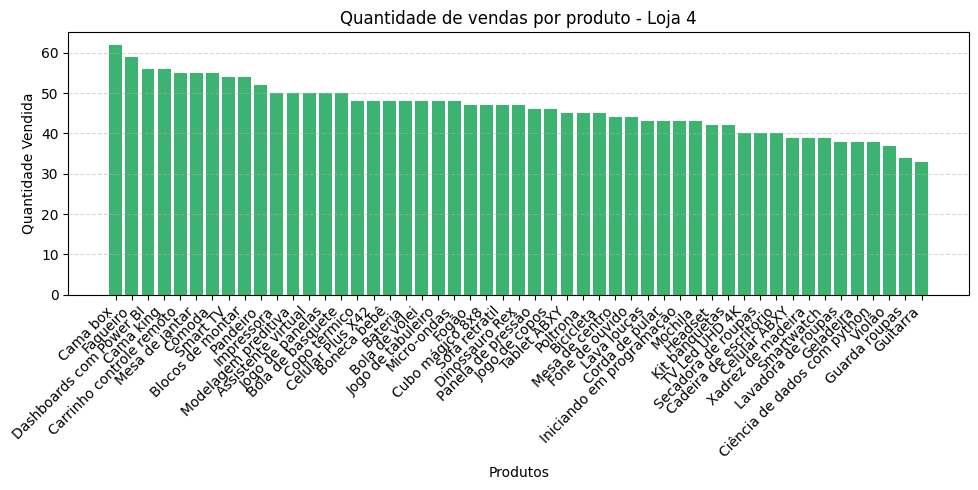

In [4]:
def listaDeProdutos(loja):
  loja['Produto'] = loja['Produto'].str.strip()
  contagem = loja['Produto'].value_counts()
  return [(produto, int(quantidade)) for produto, quantidade in contagem.items()]


def plotar_grafico_produtos(lista_produtos, nome_loja):
    produtos = [item[0] for item in lista_produtos]
    quantidades = [item[1] for item in lista_produtos]

    plt.figure(figsize=(10, 5))
    plt.bar(produtos, quantidades, color='mediumseagreen')
    plt.title(f'Quantidade de vendas por produto - {nome_loja}')
    plt.xlabel('Produtos')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Gerando os gráficos
listaDeProdutosLoja1 = listaDeProdutos(loja)
listaDeProdutosLoja2 = listaDeProdutos(loja2)
listaDeProdutosLoja3 = listaDeProdutos(loja3)
listaDeProdutosLoja4 = listaDeProdutos(loja4)

lojas = [listaDeProdutosLoja1, listaDeProdutosLoja2, listaDeProdutosLoja3, listaDeProdutosLoja4]

nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
for i in range(4):
    plotar_grafico_produtos(lojas[i], nomes_lojas[i])

# 3. Média de Avaliação das Lojas

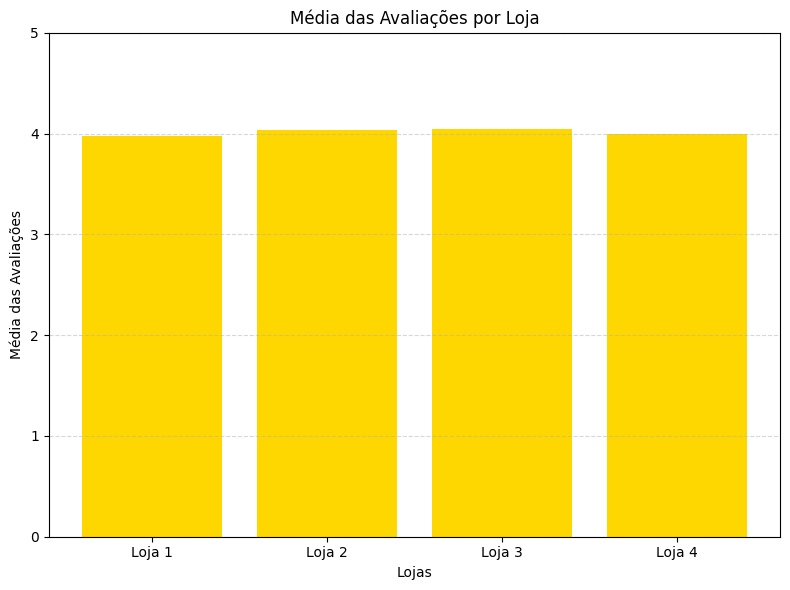

In [ ]:
mediaDasNotasLoja1 = loja['Avaliação da compra'].sum() / loja['Avaliação da compra'].count()
mediaDasNotasLoja2 = loja2['Avaliação da compra'].sum() / loja2['Avaliação da compra'].count()
mediaDasNotasLoja3 = loja3['Avaliação da compra'].sum() / loja3['Avaliação da compra'].count()
mediaDasNotasLoja4 = loja4['Avaliação da compra'].sum() / loja4['Avaliação da compra'].count()
medias = [mediaDasNotasLoja1, mediaDasNotasLoja2, mediaDasNotasLoja3, mediaDasNotasLoja4]
nomesLojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(nomesLojas, medias, color='gold')
plt.title('Média das Avaliações por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média das Avaliações')
plt.ylim(0.0, 5.0)  # Avaliações vão de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

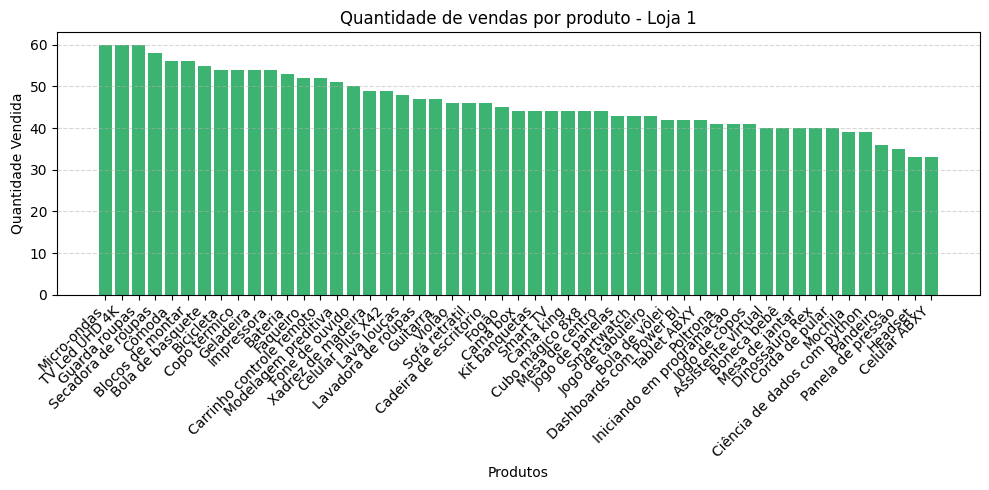

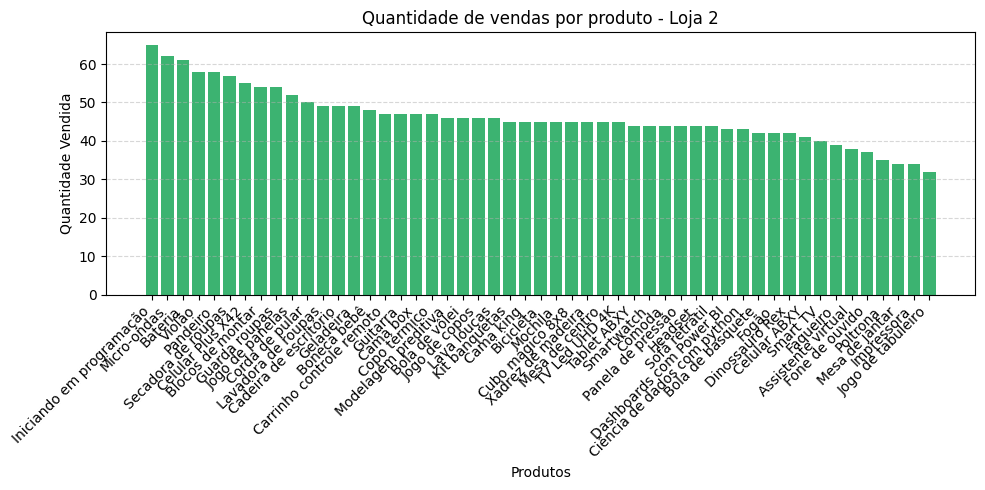

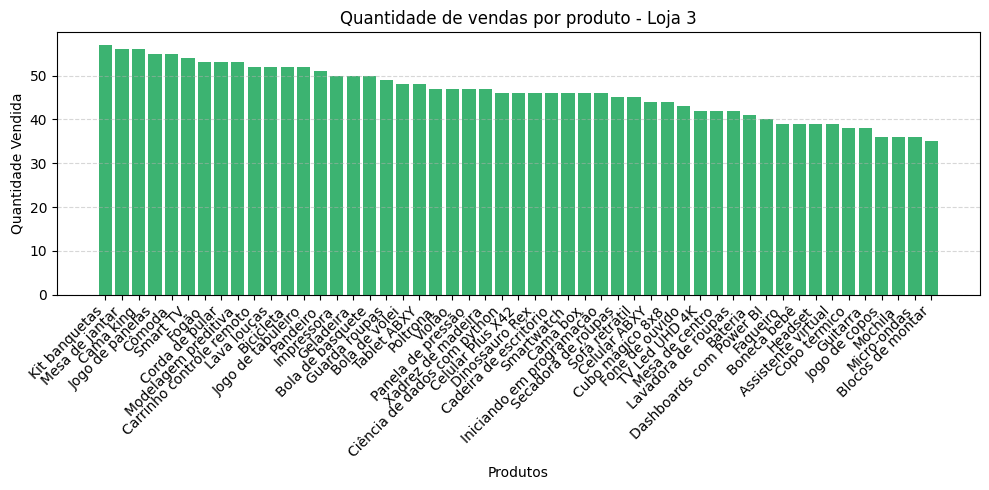

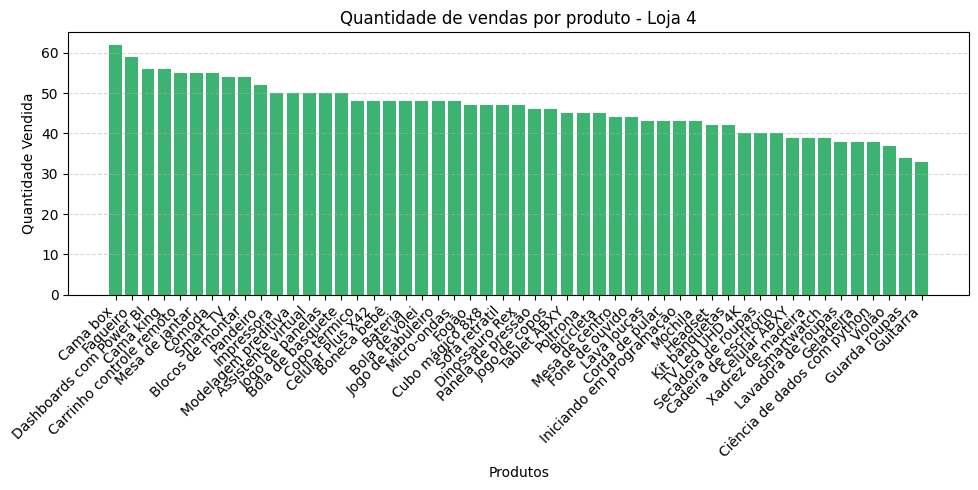

In [10]:
def listaDeProdutos(loja):

  contagem = loja['Produto'].value_counts()
  return [(produto, int(quantidade)) for produto, quantidade in contagem.items()]


def maisEMenosVendido(loja):
    qtdMais = -1
    qtdMenos = float('inf')
    produtosMaisVendidos = []
    produtosMenosVendidos = []

    for produto, quantidade in loja:
        if quantidade > qtdMais:
            qtdMais = quantidade
            produtosMaisVendidos = [produto]
        elif quantidade == qtdMais:
            produtosMaisVendidos.append(produto)
        if quantidade < qtdMenos:
            qtdMenos = quantidade
            produtosMenosVendidos = [produto]
        elif quantidade == qtdMenos:
            produtosMenosVendidos.append(produto)

    prodMaisStr = ', '.join(produtosMaisVendidos)
    prodMenosStr = ', '.join(produtosMenosVendidos)

    return qtdMais, prodMaisStr, qtdMenos, prodMenosStr


def graficoProdutos(lista_produtos, nome_loja):
    produtos = [item[0] for item in lista_produtos]
    quantidades = [item[1] for item in lista_produtos]

    plt.figure(figsize=(10, 5))
    plt.bar(produtos, quantidades, color='mediumseagreen')
    plt.title(f'Quantidade de vendas por produto - {nome_loja}')
    plt.xlabel('Produtos')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Gerando os gráficos
listaDeProdutosLoja1 = listaDeProdutos(loja)
listaDeProdutosLoja2 = listaDeProdutos(loja2)
listaDeProdutosLoja3 = listaDeProdutos(loja3)
listaDeProdutosLoja4 = listaDeProdutos(loja4)

lojas = [listaDeProdutosLoja1, listaDeProdutosLoja2, listaDeProdutosLoja3, listaDeProdutosLoja4]

nomesLojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
for i in range(4):
    graficoProdutos(lojas[i], nomesLojas[i])


# 5. Frete Médio por Loja


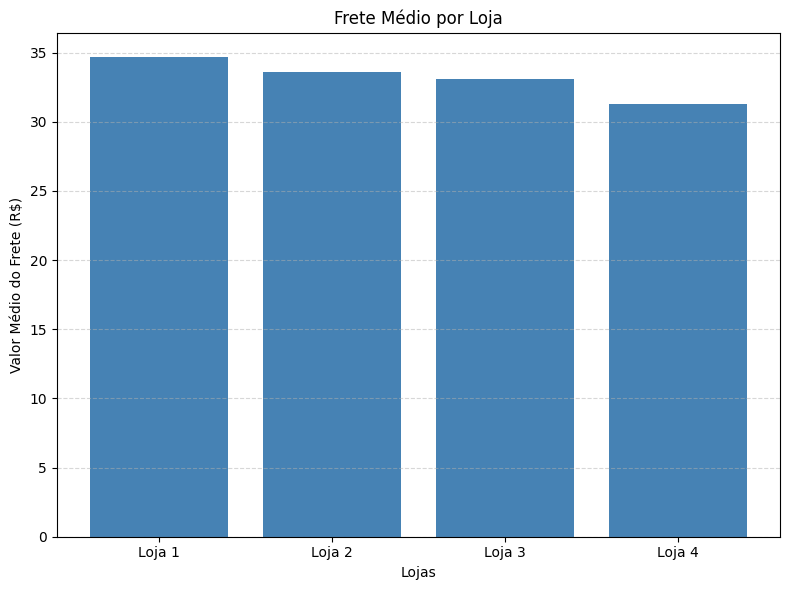

In [ ]:
freteMedioDaLoja1 = loja['Frete'].sum() / loja['Frete'].count()
freteMedioDaLoja2 = loja2['Frete'].sum() / loja2['Frete'].count()
freteMedioDaLoja3 = loja3['Frete'].sum() / loja3['Frete'].count()
freteMedioDaLoja4 = loja4['Frete'].sum() / loja4['Frete'].count()
fretes = [freteMedioDaLoja1, freteMedioDaLoja2, freteMedioDaLoja3, freteMedioDaLoja4]
nomesLojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Gráfico
plt.figure(figsize=(8, 6))
plt.bar(nomesLojas, fretes, color='steelblue')
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Valor Médio do Frete (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()